### Student Information
Name: 林柏臣

Student ID: 111062665

GitHub ID: danielpclin

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__.

# Part 2
new dataset

In [1]:
### Begin Assignment Here
import pandas as pd
import numpy as np
import helpers.data_mining_helpers as dmh
import csv

In [2]:
# read data with pd.read_csv
imdb = pd.read_csv('sentiment labelled sentences/imdb_labelled.txt', sep='\t', quoting=csv.QUOTE_NONE, names=['sentence', 'score'])
imdb

,sentence,score
0,"A very, very, very slow-moving, aimless movie ...",0
1,Not sure who was more lost - the flat characte...,0
2,Attempting artiness with black & white and cle...,0
3,Very little music or anything to speak of.,0
4,The best scene in the movie was when Gerardo i...,1
...,...,...
995,I just got bored watching Jessice Lange take h...,0
996,"Unfortunately, any virtue in this film's produ...",0
997,"In a word, it is embarrassing.",0
998,Exceptionally bad!,0


In [3]:
amazon_cells = pd.read_csv('sentiment labelled sentences/amazon_cells_labelled.txt', sep='\t', quoting=csv.QUOTE_NONE, names=['sentence', 'score'])
amazon_cells

,sentence,score
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1
...,...,...
995,The screen does get smudged easily because it ...,0
996,What a piece of junk.. I lose more calls on th...,0
997,Item Does Not Match Picture.,0
998,The only thing that disappoint me is the infra...,0


In [4]:
yelp = pd.read_csv('sentiment labelled sentences/yelp_labelled.txt', sep='\t', quoting=csv.QUOTE_NONE, names=['sentence', 'score'])
yelp

,sentence,score
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot: title={'center': 'IMDB Score distribution'}>

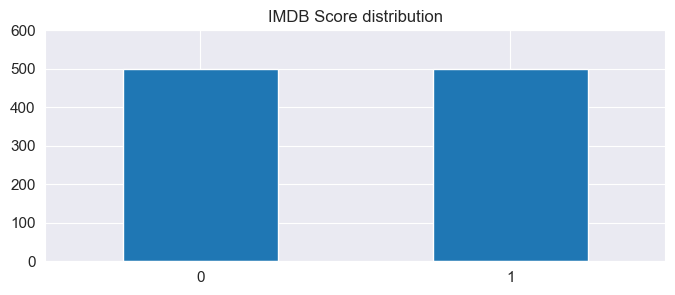

In [6]:
# View score distribution for all three datasets
imdb.score.value_counts().plot(kind = 'bar', title = 'IMDB Score distribution', ylim = [0, 600], rot = 0, fontsize = 11, figsize = (8,3))


<AxesSubplot: title={'center': 'Amazon Score distribution'}>

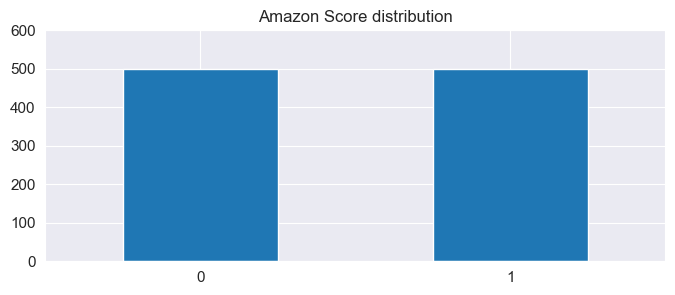

In [7]:
amazon_cells.score.value_counts().plot(kind = 'bar', title = 'Amazon Score distribution', ylim = [0, 600], rot = 0, fontsize = 11, figsize = (8,3))


<AxesSubplot: title={'center': 'Yelp Score distribution'}>

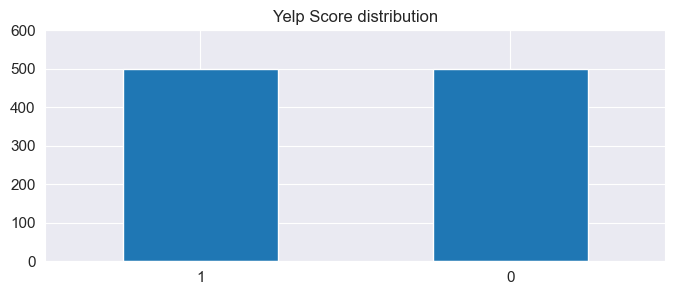

In [8]:
yelp.score.value_counts().plot(kind = 'bar', title = 'Yelp Score distribution', ylim = [0, 600], rot = 0, fontsize = 11, figsize = (8,3))


In [9]:
import nltk

# Generate unigrams
imdb['unigrams'] = imdb['sentence'].apply(lambda x: dmh.tokenize_text(x))
amazon_cells['unigrams'] = amazon_cells['sentence'].apply(lambda x: dmh.tokenize_text(x))
yelp['unigrams'] = yelp['sentence'].apply(lambda x: dmh.tokenize_text(x))


In [10]:
imdb[0:4]["unigrams"]


0    [A, very, ,, very, ,, very, slow-moving, ,, ai...
1    [Not, sure, who, was, more, lost, -, the, flat...
2    [Attempting, artiness, with, black, &, white, ...
3    [Very, little, music, or, anything, to, speak,...
Name: unigrams, dtype: object

In [11]:
amazon_cells[0:4]["unigrams"]


0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

In [12]:
yelp[0:4]["unigrams"]


0                    [Wow, ..., Loved, this, place, .]
1                            [Crust, is, not, good, .]
2    [Not, tasty, and, the, texture, was, just, nas...
3    [Stopped, by, during, the, late, May, bank, ho...
Name: unigrams, dtype: object

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

imdb_count_vect = CountVectorizer()
imdb_counts = imdb_count_vect.fit_transform(imdb.sentence) #learn the vocabulary and return document-term matrix
print(imdb_counts[0])


  (0, 2871)	3
  (0, 2404)	1
  (0, 1750)	1
  (0, 92)	1
  (0, 1748)	1
  (0, 37)	1
  (0, 748)	1
  (0, 786)	1
  (0, 3037)	1
  (0, 1639)	1


In [14]:
amazon_cells_count_vect = CountVectorizer()
amazon_cells_counts = amazon_cells_count_vect.fit_transform(amazon_cells.sentence) #learn the vocabulary and return document-term matrix
print(amazon_cells_counts[0])


  (0, 1491)	1
  (0, 1609)	1
  (0, 854)	1
  (0, 1074)	1
  (0, 1766)	1
  (0, 653)	1
  (0, 993)	1
  (0, 1640)	1
  (0, 1212)	1
  (0, 857)	1
  (0, 814)	2
  (0, 762)	1
  (0, 1604)	1
  (0, 1714)	1
  (0, 1702)	1
  (0, 711)	1
  (0, 233)	1
  (0, 367)	1


In [15]:
yelp_count_vect = CountVectorizer()
yelp_counts = yelp_count_vect.fit_transform(yelp.sentence) #learn the vocabulary and return document-term matrix
print(yelp_counts[0])


  (0, 2012)	1
  (0, 1046)	1
  (0, 1798)	1
  (0, 1330)	1


In [16]:
# We can obtain the feature names of the vectorizer
print('imdb_count_vect', imdb_count_vect.get_feature_names_out()[0:12])
print('amazon_cells_count_vect', amazon_cells_count_vect.get_feature_names_out()[0:12])
print('yelp_count_vect', yelp_count_vect.get_feature_names_out()[0:12])


imdb_count_vect ['10' '12' '13' '15' '15pm' '17' '18th' '1928' '1947' '1948' '1949' '1971']
amazon_cells_count_vect ['10' '100' '11' '12' '13' '15' '15g' '18' '20' '2000' '2005' '2160']
yelp_count_vect ['00' '10' '100' '11' '12' '15' '17' '1979' '20' '2007' '23' '30']


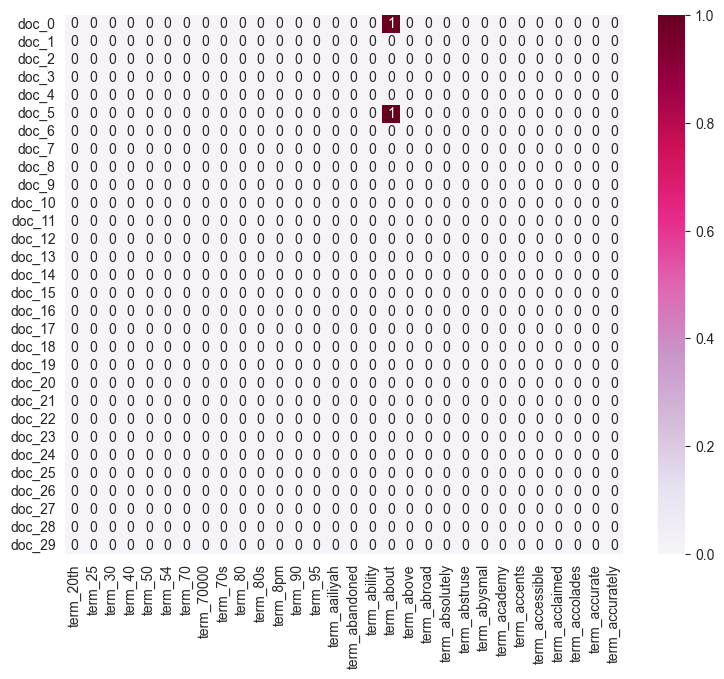

In [17]:
import seaborn as sns

# heatmap of term-document matrix (imdb)
plot_x = ["term_" + str(i) for i in imdb_count_vect.get_feature_names_out()[20:50]]
plot_y = ["doc_" + str(i) for i in list(imdb.index)[0:30]]
plot_z = imdb_counts[0:30, 20:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


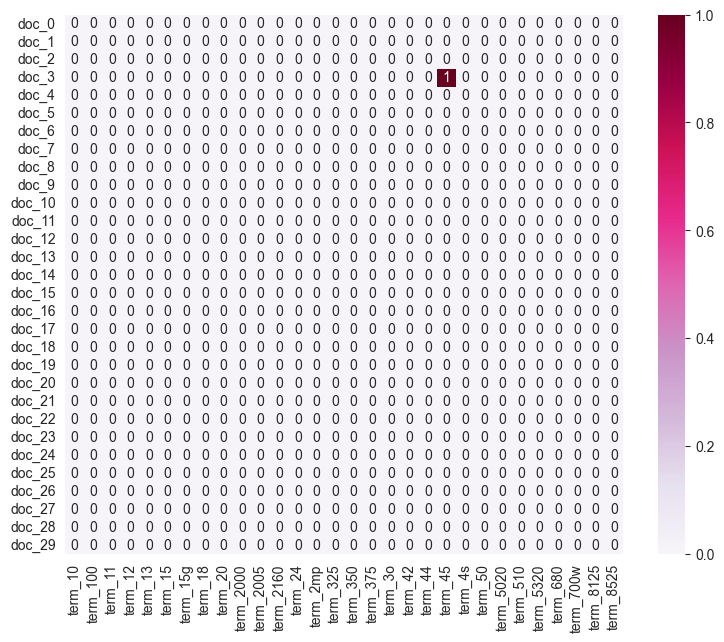

In [18]:
# heatmap of term-document matrix (amazon)
plot_x = ["term_" + str(i) for i in amazon_cells_count_vect.get_feature_names_out()[0:30]]
plot_y = ["doc_" + str(i) for i in list(amazon_cells.index)[0:30]]
plot_z = amazon_cells_counts[0:30, 0:30].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


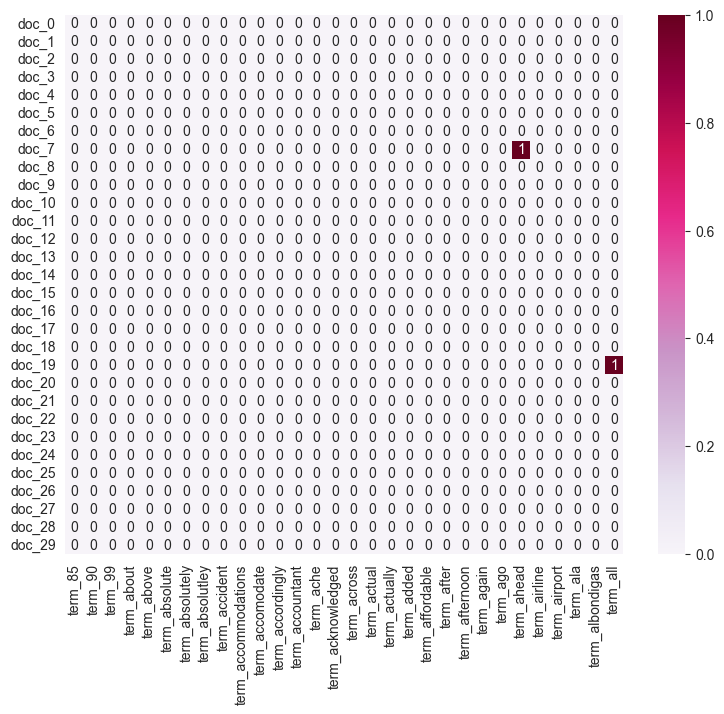

In [19]:
# heatmap of term-document matrix (yelp)
plot_x = ["term_" + str(i) for i in yelp_count_vect.get_feature_names_out()[20:50]]
plot_y = ["doc_" + str(i) for i in list(yelp.index)[0:30]]
plot_z = yelp_counts[0:30, 20:50].toarray()
df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw, cmap="PuRd", vmin=0, vmax=1, annot=True)


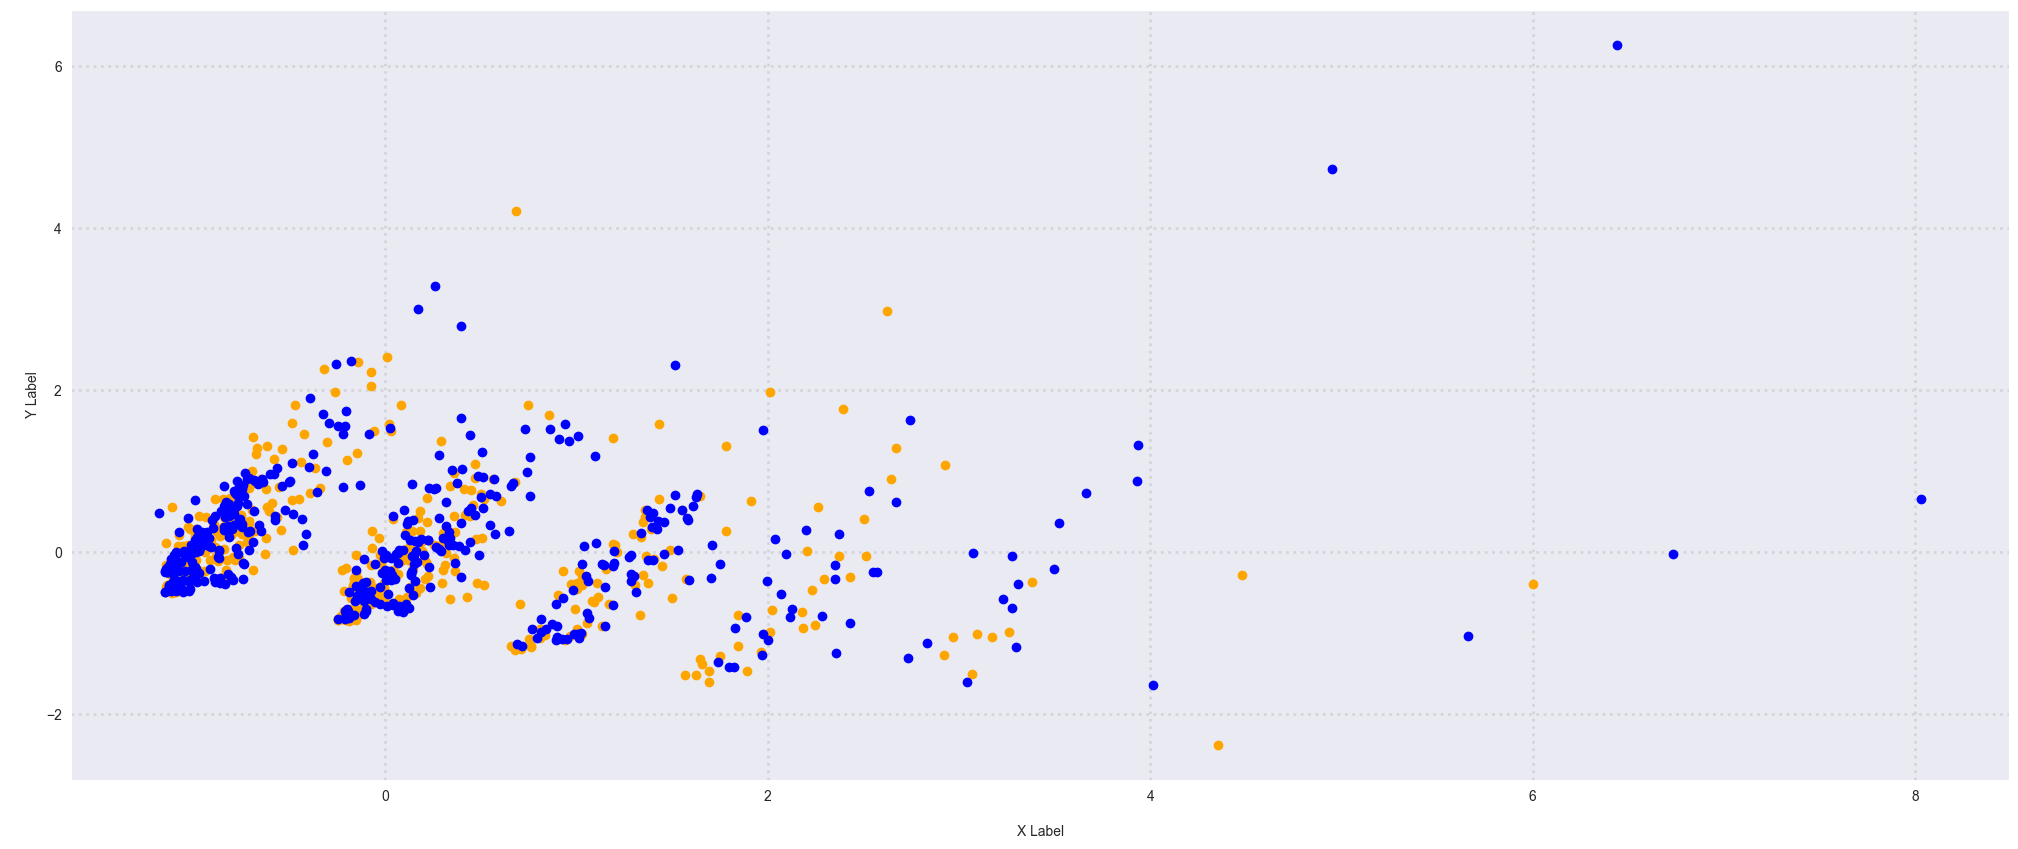

In [20]:
from sklearn.decomposition import PCA

# PCA imdb
imdb_reduced = PCA(n_components = 2).fit_transform(imdb_counts.toarray())
col = ['orange', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0, 1]):
    xs = imdb_reduced[imdb['score'] == category].T[0]
    ys = imdb_reduced[imdb['score'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()

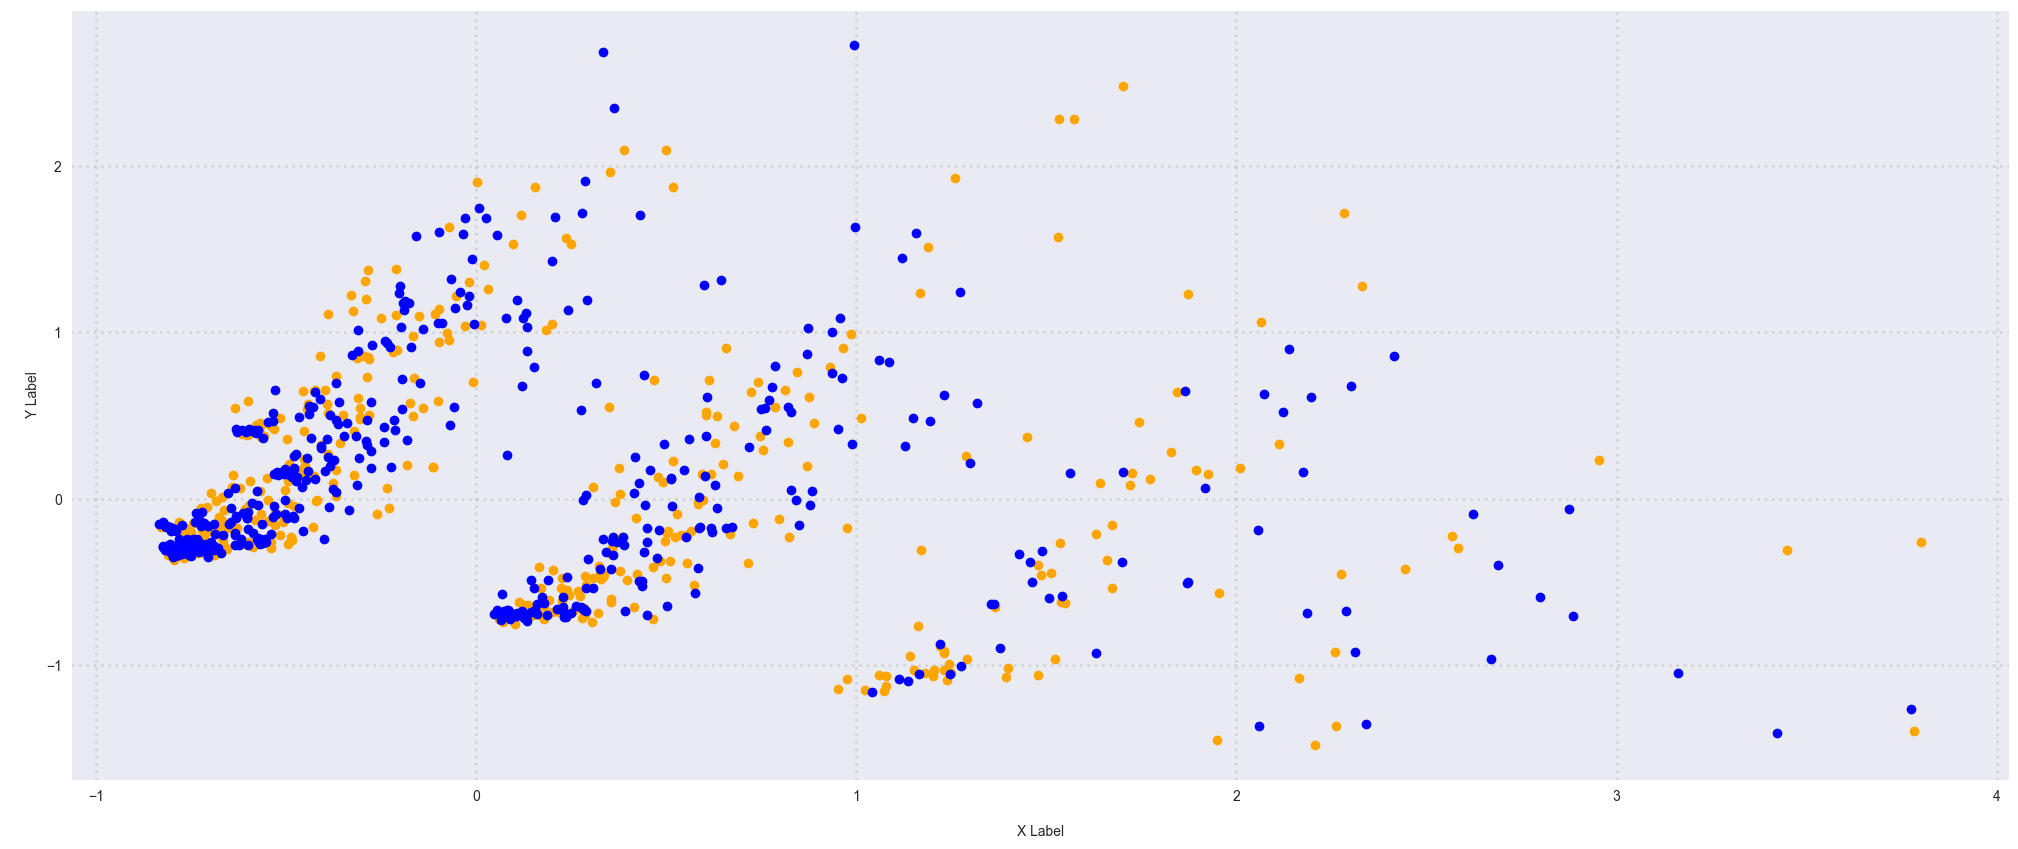

In [21]:
# PCA amazon
amazon_reduced = PCA(n_components = 2).fit_transform(amazon_cells_counts.toarray())
col = ['orange', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0, 1]):
    xs = amazon_reduced[amazon_cells['score'] == category].T[0]
    ys = amazon_reduced[amazon_cells['score'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


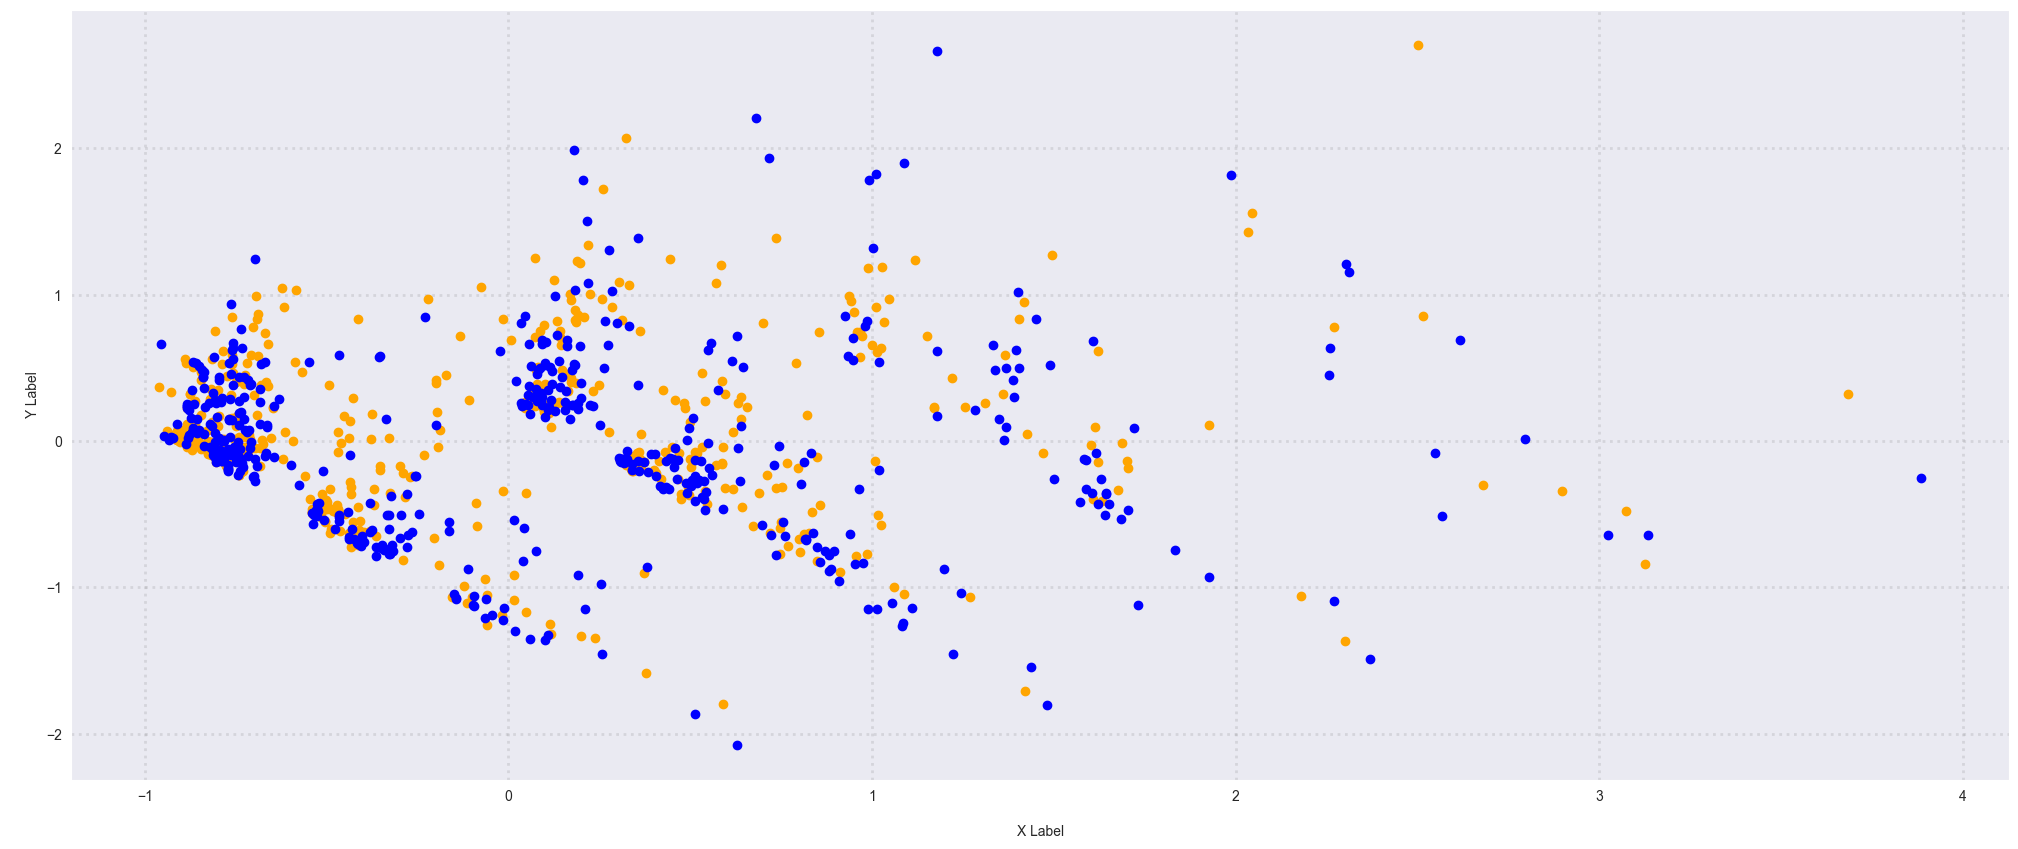

In [22]:
# PCA yelp
yelp_reduced = PCA(n_components = 2).fit_transform(yelp_counts.toarray())
col = ['orange', 'blue']

# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, category in zip(col, [0, 1]):
    xs = yelp_reduced[yelp['score'] == category].T[0]
    ys = yelp_reduced[yelp['score'] == category].T[1]

    ax.scatter(xs, ys, c = c, marker='o')

ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')

plt.show()


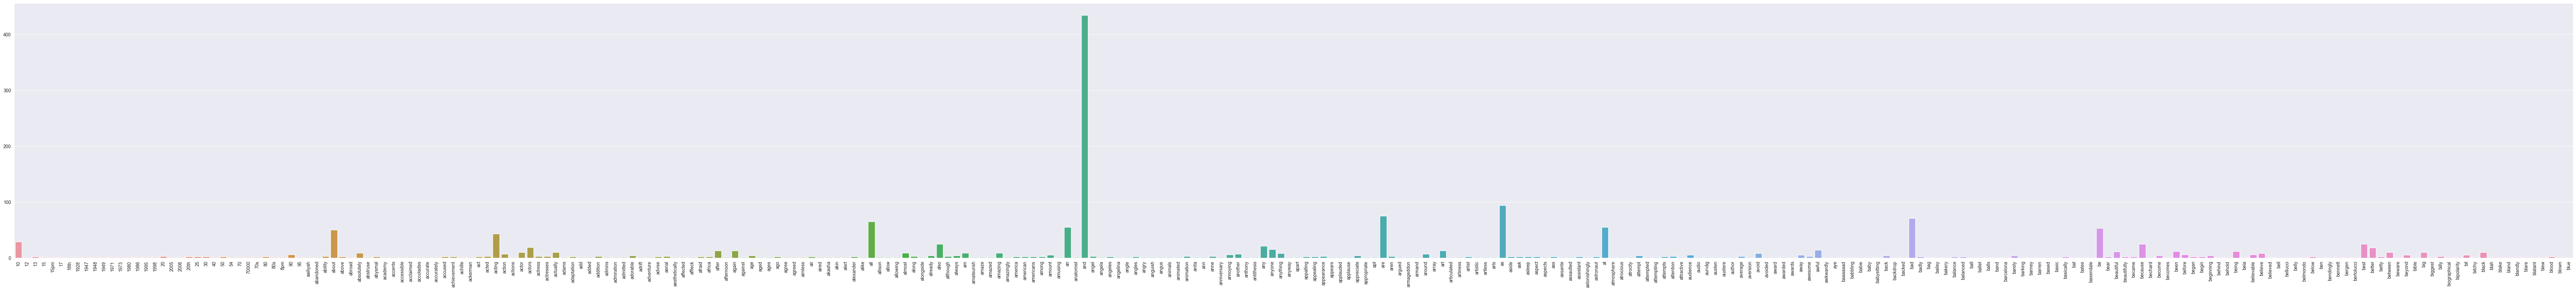

In [23]:
# Calculate term frequencies imdb
imdb_term_frequencies = []
for j in range(0, imdb_counts.shape[1]):
    imdb_term_frequencies.append(sum(imdb_counts[:, j].toarray()))
imdb_term_frequencies = np.asarray(imdb_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=imdb_count_vect.get_feature_names_out()[:300],
                y=imdb_term_frequencies[:300])
g.set_xticklabels(imdb_count_vect.get_feature_names_out()[:300], rotation = 90);


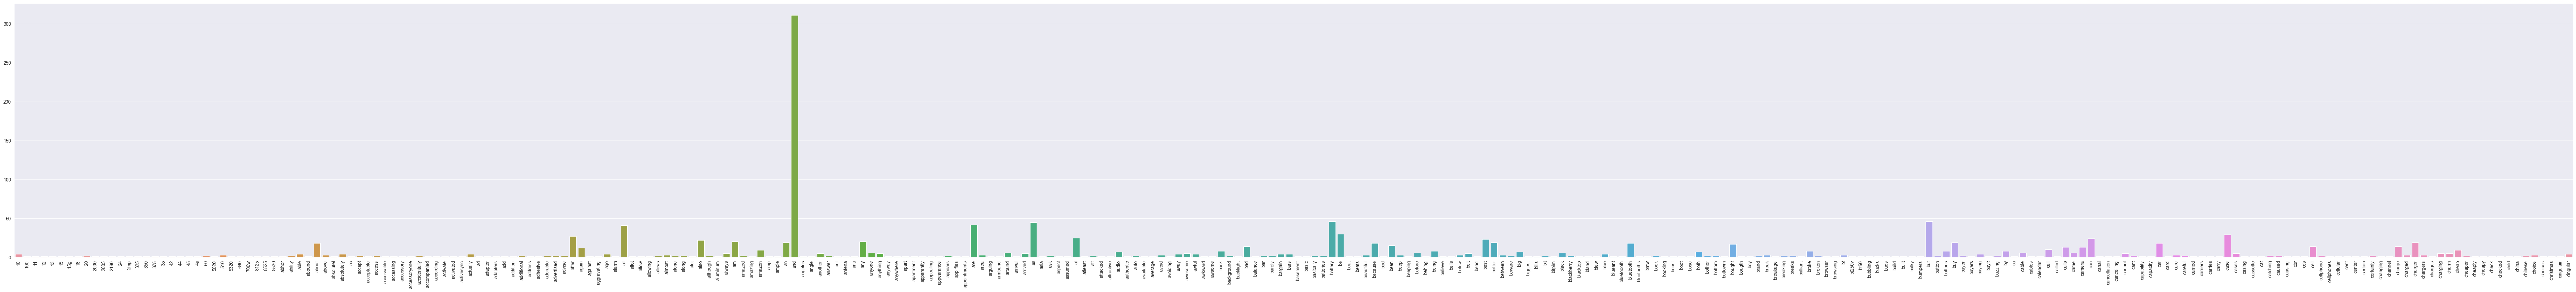

In [24]:
# Calculate term frequencies amazon
amazon_term_frequencies = []
for j in range(0, amazon_cells_counts.shape[1]):
    amazon_term_frequencies.append(sum(amazon_cells_counts[:, j].toarray()))
amazon_term_frequencies = np.asarray(amazon_cells_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=amazon_cells_count_vect.get_feature_names_out()[:300],
                y=amazon_term_frequencies[:300])
g.set_xticklabels(amazon_cells_count_vect.get_feature_names_out()[:300], rotation = 90);


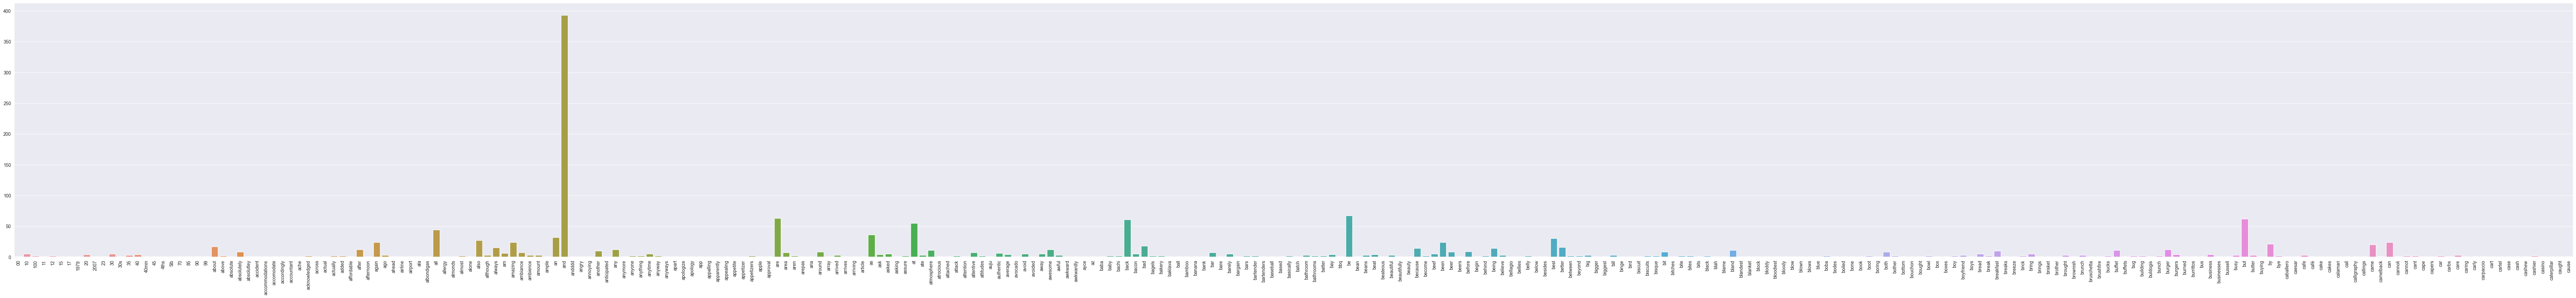

In [25]:
# Calculate term frequencies yelp
yelp_term_frequencies = []
for j in range(0, yelp_counts.shape[1]):
    yelp_term_frequencies.append(sum(yelp_counts[:, j].toarray()))
yelp_term_frequencies = np.asarray(yelp_counts.sum(axis=0))[0]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=yelp_count_vect.get_feature_names_out()[:300],
                y=yelp_term_frequencies[:300])
g.set_xticklabels(yelp_count_vect.get_feature_names_out()[:300], rotation = 90);


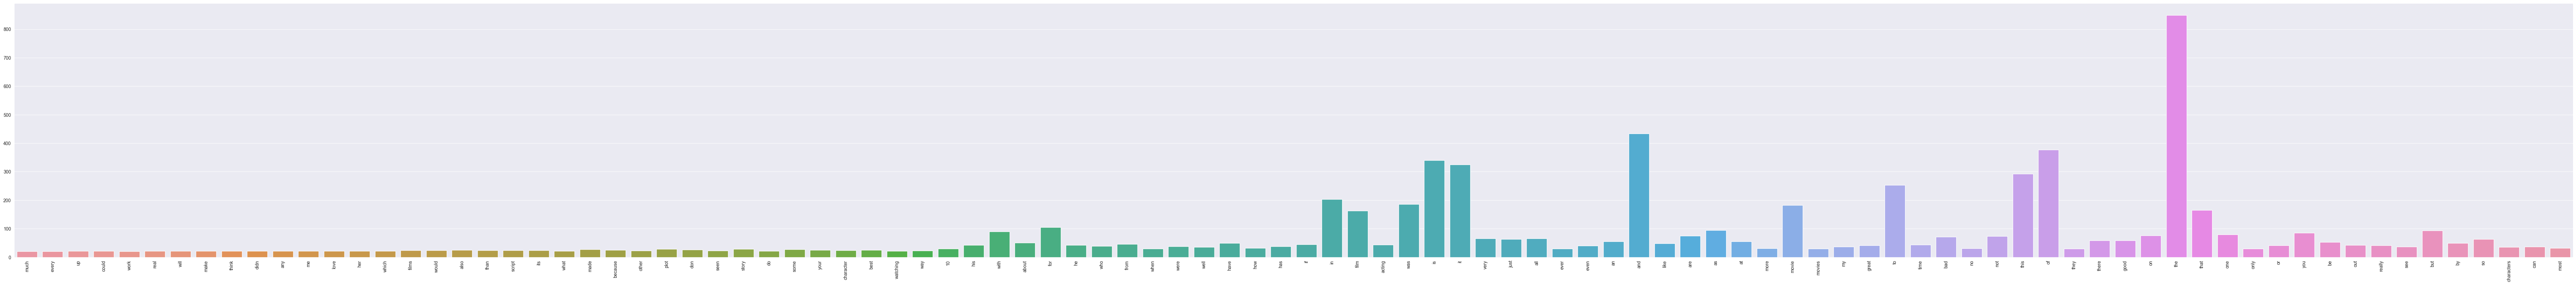

In [26]:
# We find the max 100 indices and plot them imdb
ind = np.argpartition(imdb_term_frequencies, -100)[-100:]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=imdb_count_vect.get_feature_names_out()[ind], y=imdb_term_frequencies[ind])
g.set_xticklabels(imdb_count_vect.get_feature_names_out()[ind], rotation = 90);


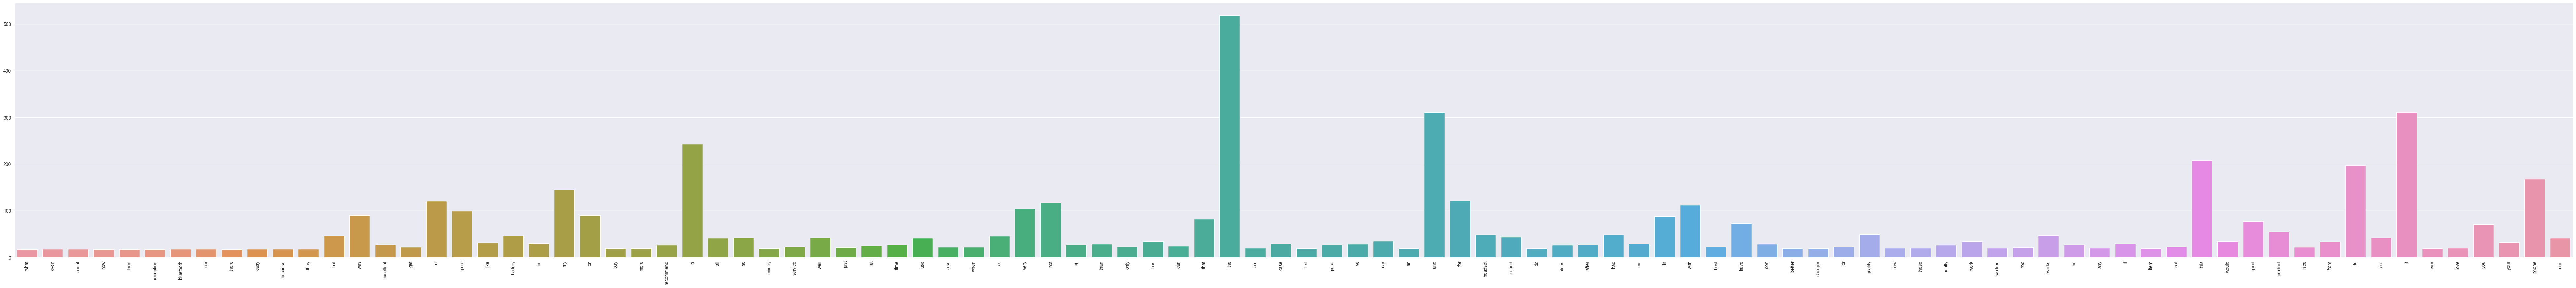

In [27]:
# We find the max 100 indices and plot them amazon
ind = np.argpartition(amazon_term_frequencies, -100)[-100:]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=amazon_cells_count_vect.get_feature_names_out()[ind], y=amazon_term_frequencies[ind])
g.set_xticklabels(amazon_cells_count_vect.get_feature_names_out()[ind], rotation = 90);


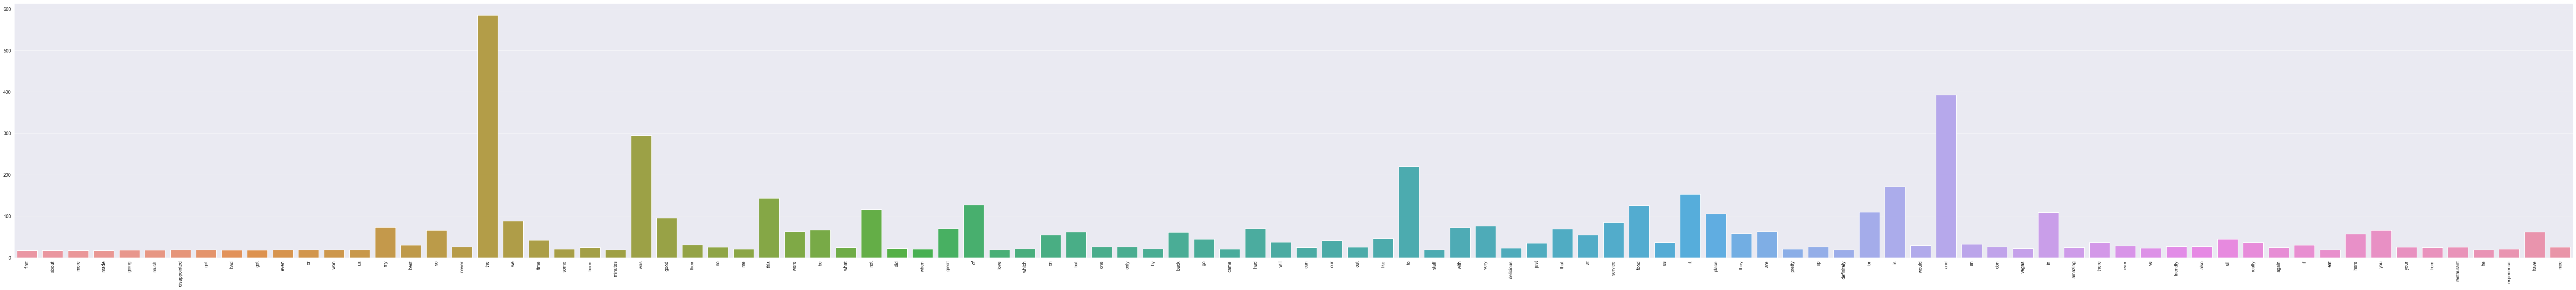

In [28]:
# We find the max 100 indices and plot them yelp
ind = np.argpartition(yelp_term_frequencies, -100)[-100:]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=yelp_count_vect.get_feature_names_out()[ind], y=yelp_term_frequencies[ind])
g.set_xticklabels(yelp_count_vect.get_feature_names_out()[ind], rotation = 90);


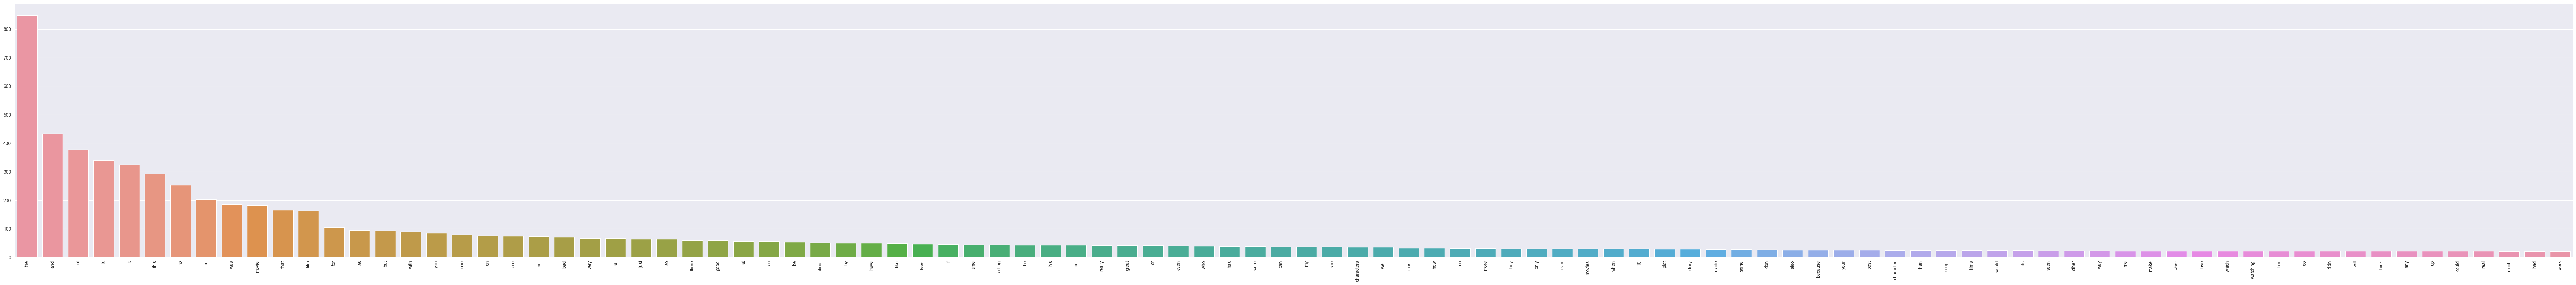

In [29]:
# long tail imdb
ind = np.argsort(imdb_term_frequencies)[-100:][::-1]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=imdb_count_vect.get_feature_names_out()[ind], y=imdb_term_frequencies[ind])
g.set_xticklabels(imdb_count_vect.get_feature_names_out()[ind], rotation = 90);


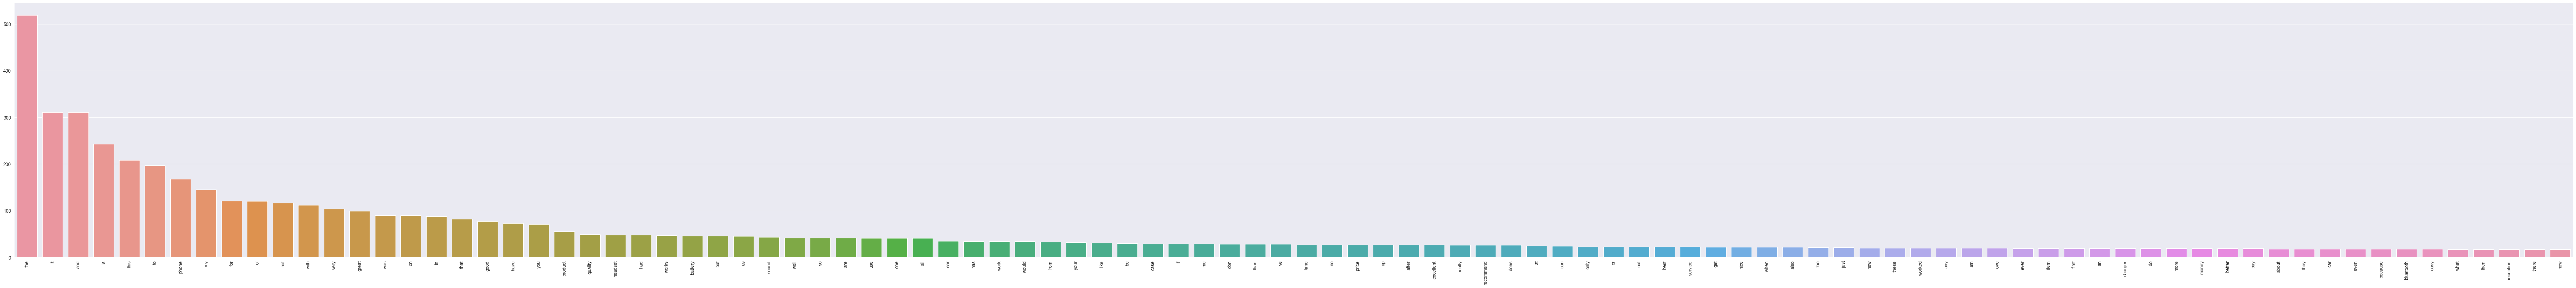

In [30]:
# long tail imdb
ind = np.argsort(amazon_term_frequencies)[-100:][::-1]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=amazon_cells_count_vect.get_feature_names_out()[ind], y=amazon_term_frequencies[ind])
g.set_xticklabels(amazon_cells_count_vect.get_feature_names_out()[ind], rotation = 90);


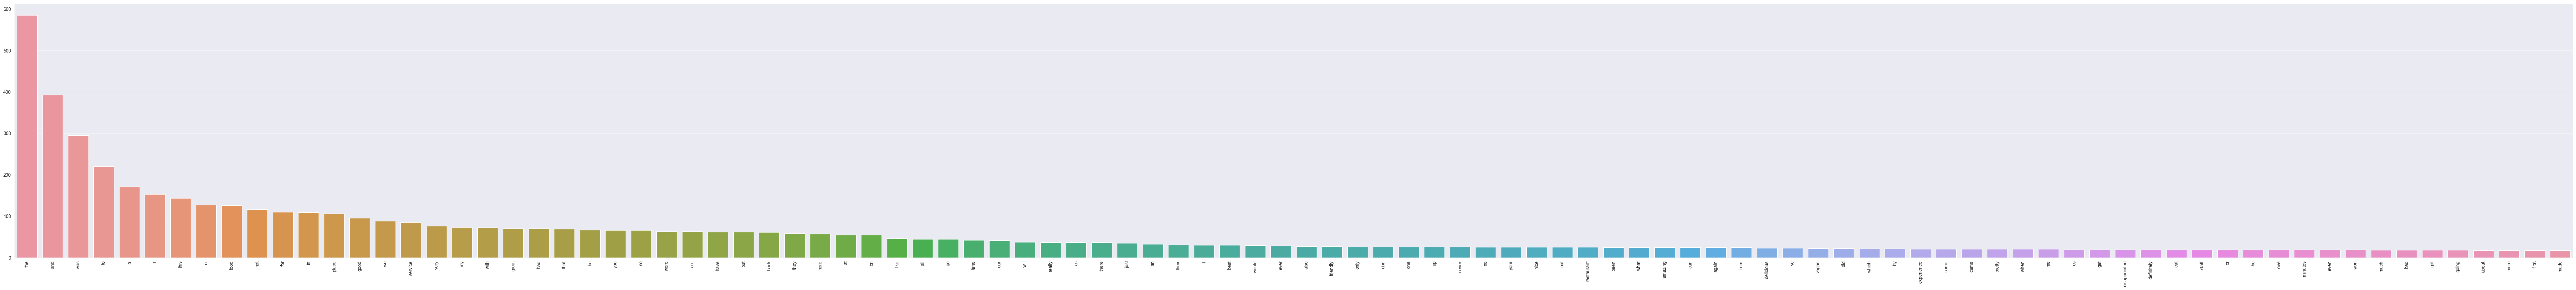

In [31]:
# long tail yelp
ind = np.argsort(yelp_term_frequencies)[-100:][::-1]
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=yelp_count_vect.get_feature_names_out()[ind], y=yelp_term_frequencies[ind])
g.set_xticklabels(yelp_count_vect.get_feature_names_out()[ind], rotation = 90);


# Part 3
Generate meaningful **new data visualizations**


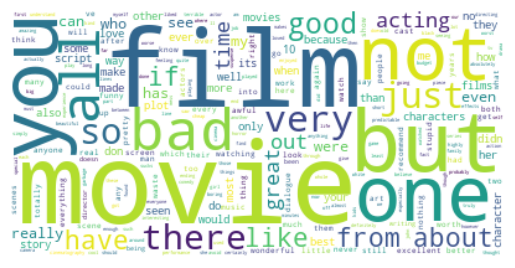

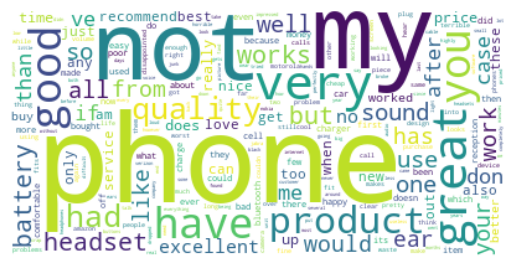

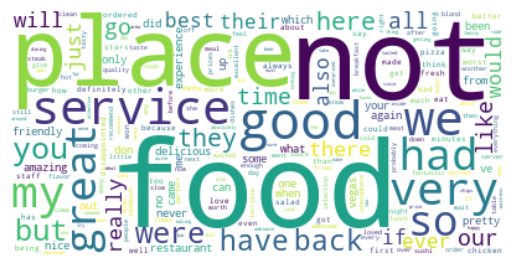

In [32]:
from wordcloud import WordCloud


def get_frequency_dict_for_wordcloud(count_vect, term_freq):
    temp = {}
    for i in range(len(term_freq)):
        if count_vect[i] in "a|the|an|the|to|in|for|of|or|by|with|is|on|that|be|and|this|was|are":
            continue
        temp[count_vect[i]] = term_freq[i]
    return temp

wc = WordCloud(background_color="white", max_words=1000)

# Count vect wordcloud
# generate imdb word cloud
wc.generate_from_frequencies(get_frequency_dict_for_wordcloud(imdb_count_vect.get_feature_names_out(), imdb_term_frequencies))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# generate amazon word cloud
wc.generate_from_frequencies(get_frequency_dict_for_wordcloud(amazon_cells_count_vect.get_feature_names_out(), amazon_term_frequencies))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()

# generate yelp word cloud
wc.generate_from_frequencies(get_frequency_dict_for_wordcloud(yelp_count_vect.get_feature_names_out(), yelp_term_frequencies))

# show
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


<BarContainer object of 150 artists>

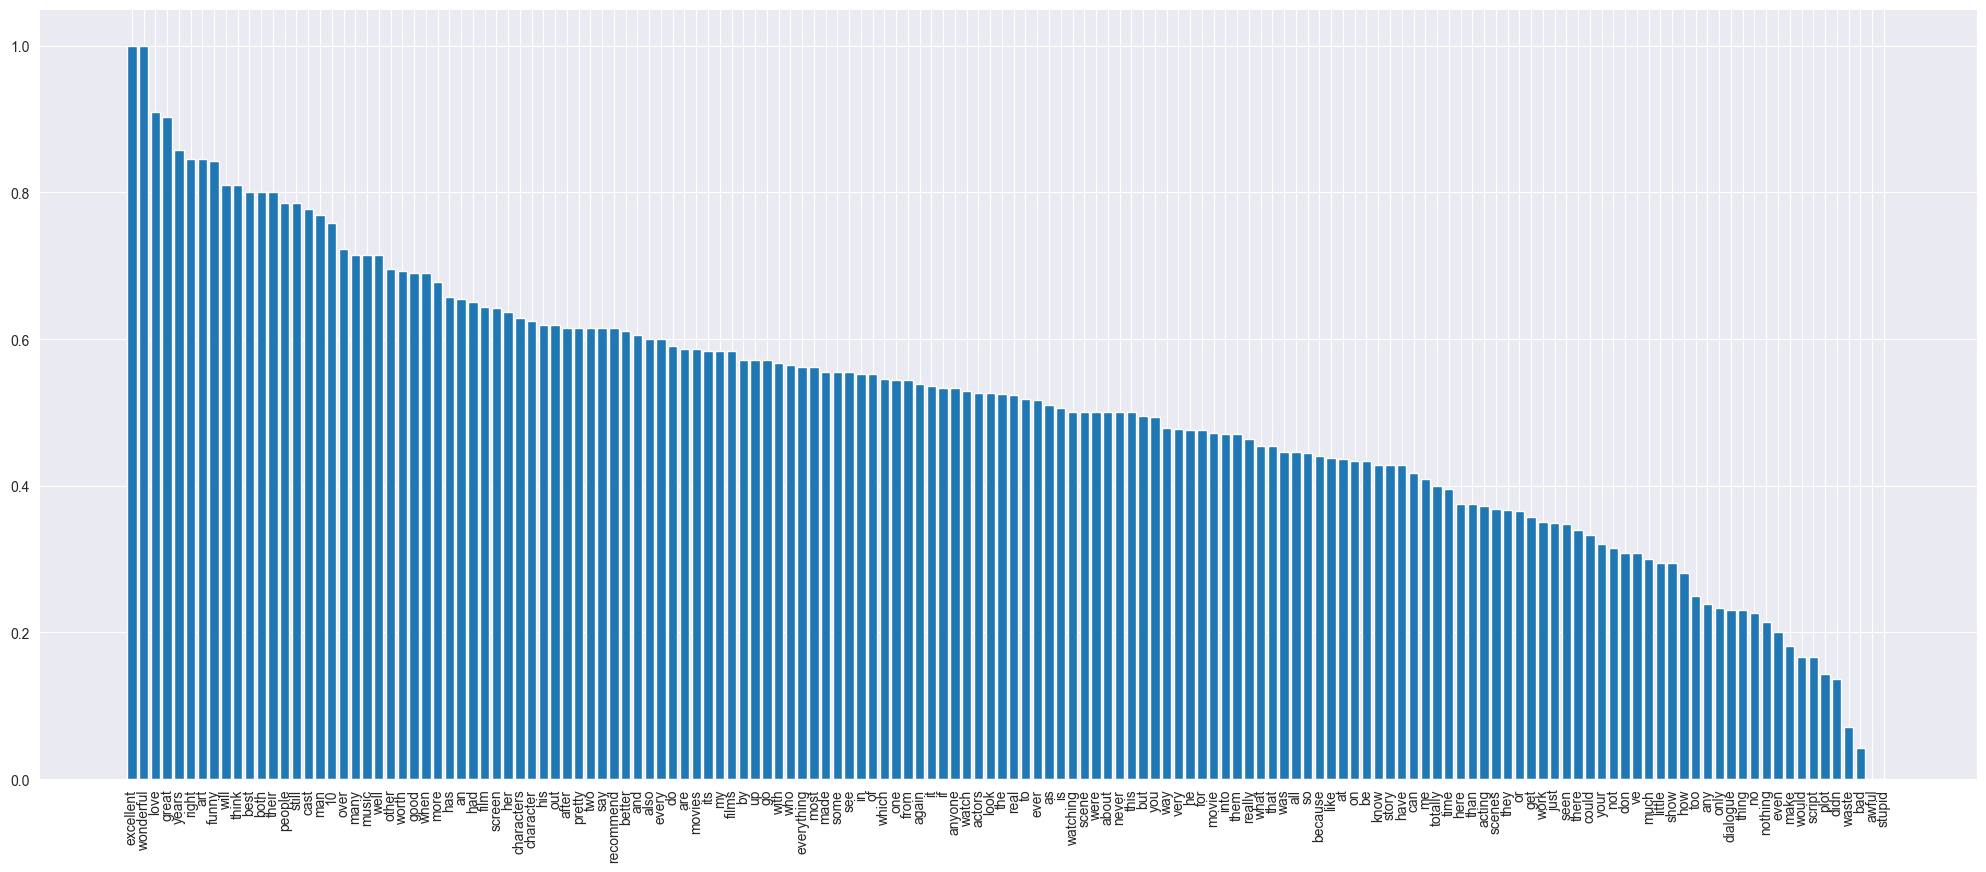

In [33]:
# sentiment value os calculated by term count * 1 if positive else * 0 divide total term count, we only pick top 150 of term count
# sentiment value of words in imdb
imdb_count_vect = CountVectorizer()
imdb_counts = imdb_count_vect.fit_transform(imdb.sentence) #learn the vocabulary and return document-term matrix
imdb_positive_counts = imdb_count_vect.transform(imdb[imdb.score == 1].sentence) #learn the vocabulary and return document-term matrix
imdb_total = np.asarray(imdb_counts.sum(axis=0)).flatten()
imdb_positive = np.asarray(imdb_positive_counts.sum(axis=0)).flatten()
ind = np.argsort(imdb_total)[::-1][:150]
height = np.divide(imdb_positive[ind], imdb_total[ind])
ind2 = np.argsort(height)[::-1]
fig = plt.figure(figsize = (25, 10))
plt.xticks(rotation='vertical')
plt.bar(x=imdb_count_vect.get_feature_names_out()[ind][ind2],height=height[ind2])

<BarContainer object of 150 artists>

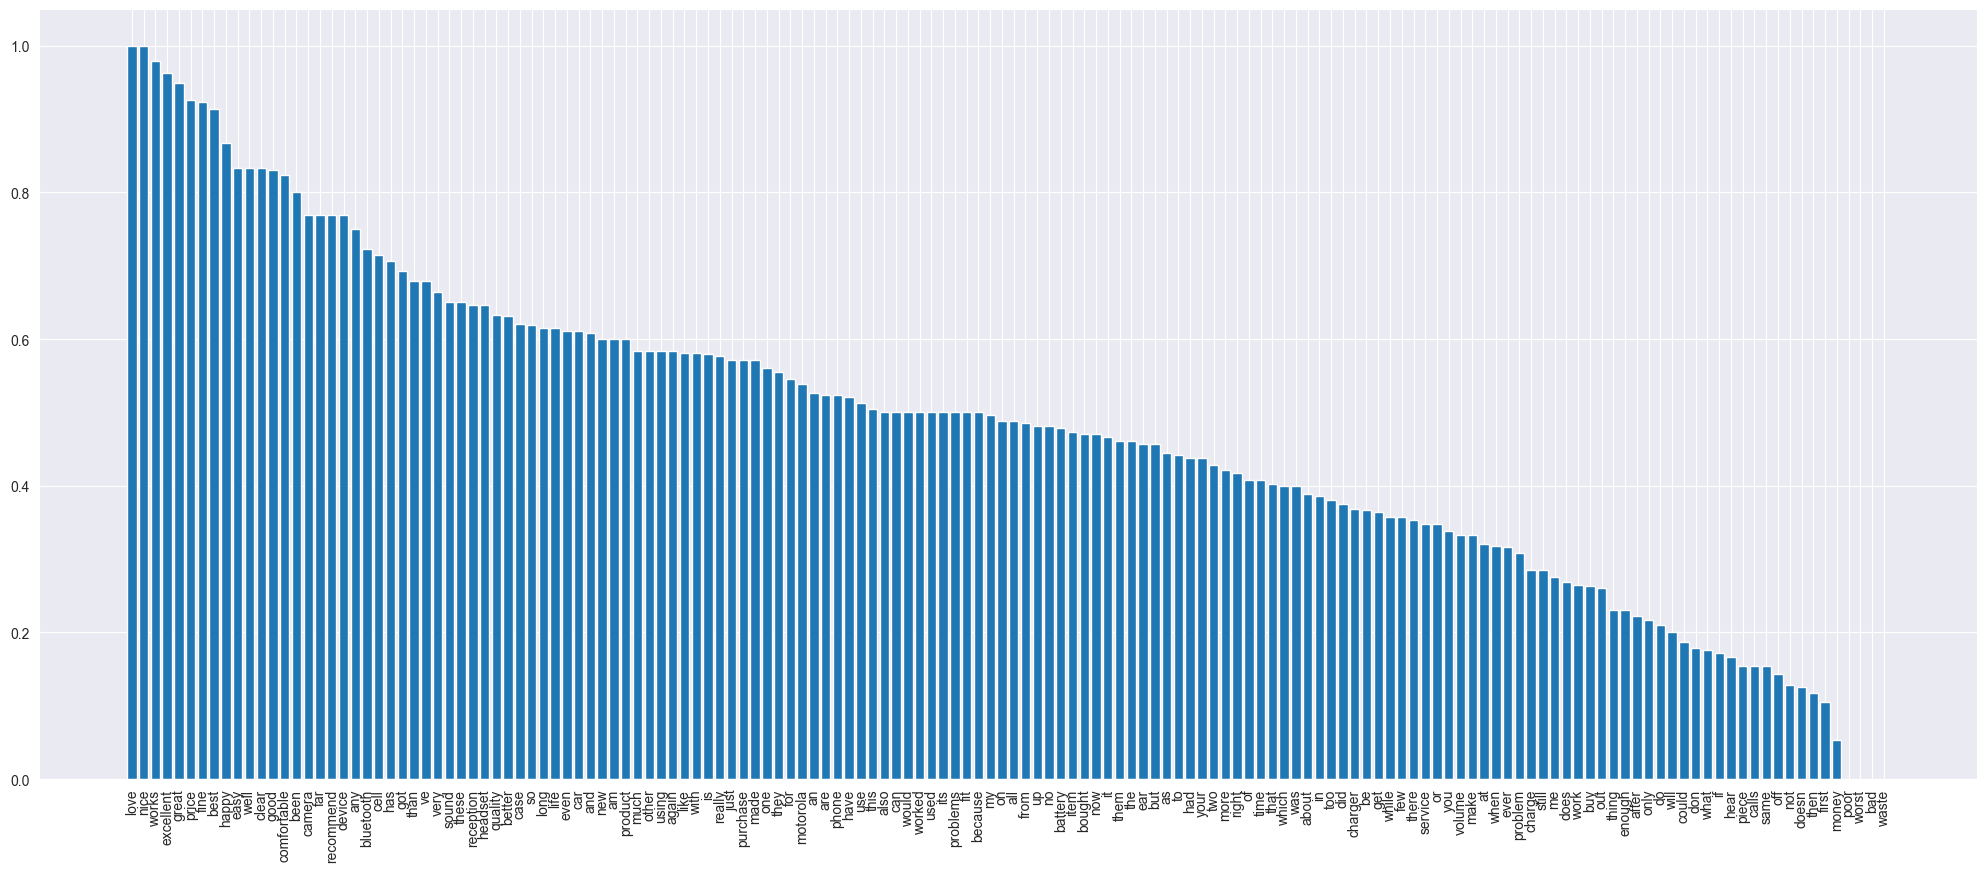

In [34]:
# sentiment value of words in amazon
amazon_count_vect = CountVectorizer()
amazon_counts = amazon_count_vect.fit_transform(amazon_cells.sentence) #learn the vocabulary and return document-term matrix
amazon_positive_counts = amazon_count_vect.transform(amazon_cells[amazon_cells.score == 1].sentence) #learn the vocabulary and return document-term matrix
amazon_total = np.asarray(amazon_counts.sum(axis=0)).flatten()
amazon_positive = np.asarray(amazon_positive_counts.sum(axis=0)).flatten()
ind = np.argsort(amazon_total)[::-1][:150]
height = np.divide(amazon_positive[ind], amazon_total[ind])
ind2 = np.argsort(height)[::-1]
fig = plt.figure(figsize = (25, 10))
plt.xticks(rotation='vertical')
plt.bar(x=amazon_count_vect.get_feature_names_out()[ind][ind2],height=height[ind2])

<BarContainer object of 150 artists>

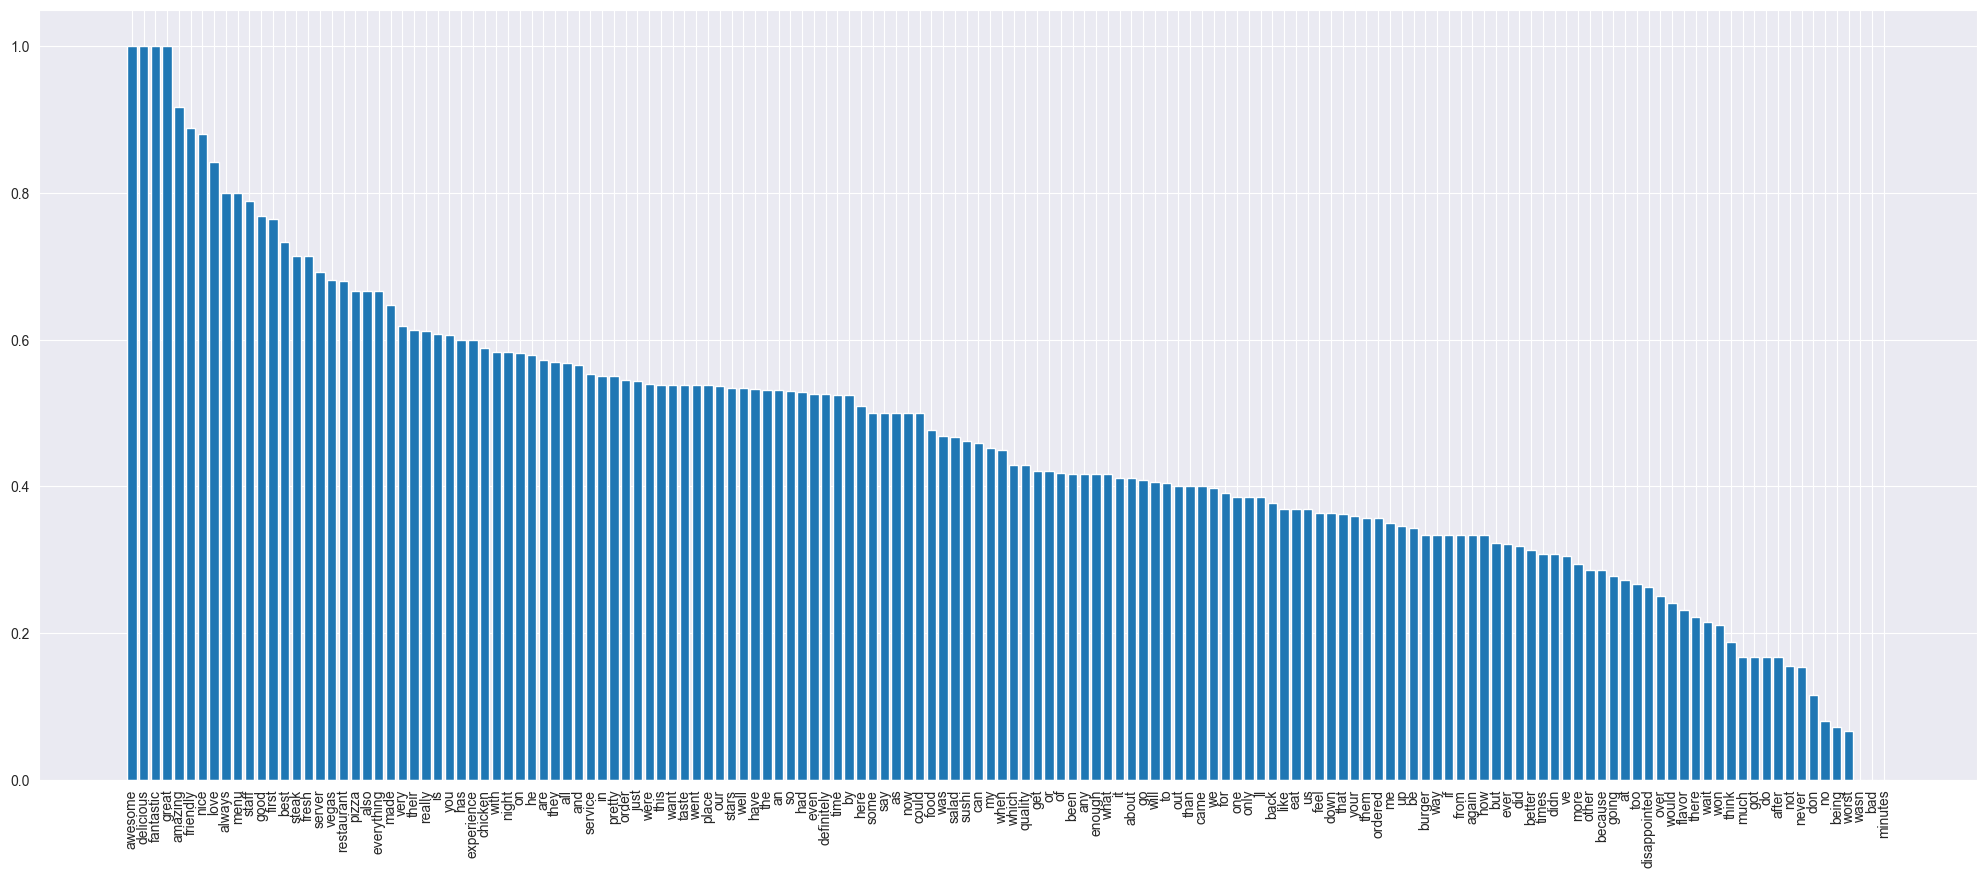

In [35]:
# sentiment value of words in yelp
yelp_count_vect = CountVectorizer()
yelp_counts = yelp_count_vect.fit_transform(yelp.sentence) #learn the vocabulary and return document-term matrix
yelp_positive_counts = yelp_count_vect.transform(yelp[yelp.score == 1].sentence) #learn the vocabulary and return document-term matrix
yelp_total = np.asarray(yelp_counts.sum(axis=0)).flatten()
yelp_positive = np.asarray(yelp_positive_counts.sum(axis=0)).flatten()
ind = np.argsort(yelp_total)[::-1][:150]
height = np.divide(yelp_positive[ind], yelp_total[ind])
ind2 = np.argsort(height)[::-1]
fig = plt.figure(figsize = (25, 10))
plt.xticks(rotation='vertical')
plt.bar(x=yelp_count_vect.get_feature_names_out()[ind][ind2],height=height[ind2])

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer

# tfidf for imdb
imdb_tfidf_vect = TfidfVectorizer()
imdb_tfidf = imdb_tfidf_vect.fit_transform(imdb.sentence)
print(imdb_tfidf[0])


  (0, 1639)	0.25024291911225127
  (0, 3037)	0.29498818103196534
  (0, 786)	0.3378967919185029
  (0, 748)	0.3378967919185029
  (0, 37)	0.19106599185888698
  (0, 1748)	0.12903447944702076
  (0, 92)	0.3378967919185029
  (0, 1750)	0.29498818103196534
  (0, 2404)	0.2792316577221939
  (0, 2871)	0.5382316162816596


In [37]:
# tfidf for imdb
amazon_tfidf_vect = TfidfVectorizer()
amazon_tfidf = imdb_tfidf_vect.fit_transform(amazon_cells.sentence)
print(amazon_tfidf[0])


  (0, 367)	0.32963001716066015
  (0, 233)	0.26091937133842197
  (0, 711)	0.2724001479983455
  (0, 1702)	0.2979650306857509
  (0, 1714)	0.31110718748699573
  (0, 1604)	0.09065770616075083
  (0, 762)	0.2877711819152493
  (0, 814)	0.3156148341874833
  (0, 857)	0.10744287763403453
  (0, 1212)	0.24777721453717727
  (0, 1640)	0.12694625638326024
  (0, 993)	0.20746710112948877
  (0, 653)	0.1449316337525006
  (0, 1766)	0.2663000442108417
  (0, 1074)	0.21424736019492926
  (0, 854)	0.11680650225372383
  (0, 1609)	0.22925438486351277
  (0, 1491)	0.19164819187071502


In [38]:
# tfidf for imdb
yelp_tfidf_vect = TfidfVectorizer()
yelp_tfidf = yelp_tfidf_vect.fit_transform(yelp.sentence)
print(yelp_tfidf[0])


  (0, 1330)	0.33924917943793786
  (0, 1798)	0.31213680923998094
  (0, 1046)	0.5727163497116121
  (0, 2012)	0.6778470250293764


In [39]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.model_selection import train_test_split

def naive_bayes_classifier(dataset, multi=False):
    X_train, X_test, Y_train, Y_test = train_test_split(imdb.sentence, imdb.score, test_size=0.3)
    vectorizer = TfidfVectorizer()
    x_train = vectorizer.fit_transform(X_train)
    x_test = vectorizer.transform(X_test)
    bnb = MultinomialNB() if multi else BernoulliNB()
    bnb.fit(x_train, Y_train)
    print(f"tfidf score: {bnb.score(x_test, Y_test):.3f}", )

    vectorizer = CountVectorizer()
    x_train = vectorizer.fit_transform(X_train)
    x_test = vectorizer.transform(X_test)
    bnb = MultinomialNB() if multi else BernoulliNB()
    bnb.fit(x_train, Y_train)
    print(f"count vect score: {bnb.score(x_test, Y_test):.3f}", )

print("BernoulliNB")
print("imdb:")
naive_bayes_classifier(imdb)
print("amazon:")
naive_bayes_classifier(amazon_cells)
print("yelp:")
naive_bayes_classifier(yelp)
print()
print("MultinomialNB")
print("imdb:")
naive_bayes_classifier(imdb, True)
print("amazon:")
naive_bayes_classifier(amazon_cells, True)
print("yelp:")
naive_bayes_classifier(yelp, True)


BernoulliNB
imdb:
tfidf score: 0.830
count vect score: 0.830
amazon:
tfidf score: 0.780
count vect score: 0.780
yelp:
tfidf score: 0.740
count vect score: 0.740

MultinomialNB
imdb:
tfidf score: 0.797
count vect score: 0.803
amazon:
tfidf score: 0.777
count vect score: 0.780
yelp:
tfidf score: 0.813
count vect score: 0.820


# Part 4
improvements

Some parts of the DM2022-Lab1-Master are not very efficient, one example is where we calculate the term frequencies
Here in the original code, takes a long time to compute.


In [40]:
# calculate term frequencies with np.sum is much faster because it is done in c
imdb_count_vect = CountVectorizer()
imdb_counts = imdb_count_vect.fit_transform(imdb.sentence) #learn the vocabulary and return document-term matrix
np.asarray(imdb_counts.sum(axis=0))


array([[29,  1,  2, ...,  1,  2,  1]], dtype=int64)

Another part that we can optimise is where we only visualize a part of the data, we don't need to calculate all of the data.